In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
expression_data  = pd.read_csv('data.cct', sep='\t', index_col=0)
expression_data = expression_data.T
print("Datos de expresión génica:")
print(expression_data.shape)
expression_data .head()

Datos de expresión génica:
(1093, 20155)


attrib_name     A1BG    A1CF  A2BP1   A2LD1   A2ML1      A2M  A4GALT   A4GNT  \
TCGA.3C.AAAU  7.6300  0.0000  0.000  6.6999  1.2501  12.5017  6.1136  3.2655   
TCGA.3C.AALI  7.8971  0.0000  0.000  6.1672  2.4196  12.8866  7.3101  0.6265   
TCGA.3C.AALJ  8.7287  0.9310  0.000  7.3422  0.0000  13.1101  9.1671  0.0000   
TCGA.3C.AALK  7.5851  0.0000  0.000  5.9888  1.4087  13.4201  8.9870  0.0000   
TCGA.4H.AAAK  8.0762  0.5115  2.272  7.2796  2.1389  13.2268  8.4226  0.5115   

attrib_name     AAA1    AAAS  ...    ZXDA    ZXDB     ZXDC  ZYG11A   ZYG11B  \
TCGA.3C.AAAU  0.4273  9.3450  ...  7.0289  9.9784  10.6965  8.0196  10.2400   
TCGA.3C.AALI  0.0000  9.7960  ...  5.9264  8.8125  10.3924  7.6401   9.2398   
TCGA.3C.AALJ  0.0000  9.5008  ...  5.1842  9.0634   9.5884  8.3786   9.0585   
TCGA.3C.AALK  0.0000  9.6036  ...  5.8080  8.7772   9.7564  7.4629   9.2488   
TCGA.4H.AAAK  0.5115  9.6797  ...  5.6420  8.7322  10.0373  3.9110   9.6013   

attrib_name       ZYX    ZZEF1     ZZZ3  psiTPTE22  tAKR  
TCGA.3C.AAAU  11.7765  10.8887  10.2064     1.4454   0.0  
TCGA.3C.AALI  12.4267  10.3659   8.6715     9.8573   0.0  
TCGA.3C.AALJ  12.4146   9.8825   8.9958     5.1842   0.0  
TCGA.3C.AALK  12.4748   9.6113   9.4551     6.0792   0.0  
TCGA.4H.AAAK  11.9811   9.7020   9.7858     7.5564   0.0  

[5 rows x 20155 columns]

In [3]:
clinical_data = pd.read_csv('clinical.txt', sep='\t', index_col=0)
clinical_data = clinical_data.T
print("Datos clínicos:")
print(clinical_data.shape)


Datos clínicos:
(1097, 20)


In [4]:
clinical_data.head()

attrib_name  years_to_birth Tumor_purity pathologic_stage pathology_T_stage  \
TCGA.5L.AAT0             42       0.6501          stageii                t2   
TCGA.5L.AAT1             63       0.5553          stageiv                t2   
TCGA.A1.A0SP             40       0.6913          stageii                t2   
TCGA.A2.A04V             39       0.8341          stageii                t2   
TCGA.A2.A04Y             53       0.7318          stageii                t2   

attrib_name  pathology_N_stage pathology_M_stage  \
TCGA.5L.AAT0                n0                m0   
TCGA.5L.AAT1                n0                m1   
TCGA.A1.A0SP                n0                m0   
TCGA.A2.A04V                n0                m0   
TCGA.A2.A04Y                n1                m0   

attrib_name              histological_type number_of_lymph_nodes  PAM50  \
TCGA.5L.AAT0  infiltratinglobularcarcinoma                     0    NaN   
TCGA.5L.AAT1  infiltratinglobularcarcinoma                     0    NaN   
TCGA.A1.A0SP   infiltratingductalcarcinoma                     0  Basal   
TCGA.A2.A04V   infiltratingductalcarcinoma                     0   LumA   
TCGA.A2.A04Y   infiltratingductalcarcinoma                     1   LumB   

attrib_name  ER.Status PR.Status HER2.Status  gender radiation_therapy   race  \
TCGA.5L.AAT0       NaN       NaN         NaN  female               yes  white   
TCGA.5L.AAT1       NaN       NaN         NaN  female                no  white   
TCGA.A1.A0SP       NaN       NaN         NaN  female               NaN    NaN   
TCGA.A2.A04V       NaN       NaN         NaN  female                no  white   
TCGA.A2.A04Y       NaN       NaN         NaN  female               yes  white   

attrib_name             ethnicity Median_overall_survival overall_survival  \
TCGA.5L.AAT0     hispanicorlatino                       0             1477   
TCGA.5L.AAT1     hispanicorlatino                       0             1471   
TCGA.A1.A0SP  nothispanicorlatino                       0              584   
TCGA.A2.A04V  nothispanicorlatino                       0             1920   
TCGA.A2.A04Y                  NaN                       0             1099   

attrib_name  status overallsurvival  
TCGA.5L.AAT0      0          1477,0  
TCGA.5L.AAT1      0          1471,0  
TCGA.A1.A0SP      0           584,0  
TCGA.A2.A04V      1          1920,1  
TCGA.A2.A04Y      0          1099,0

In [5]:
print(clinical_data.columns)


Index(['years_to_birth', 'Tumor_purity', 'pathologic_stage',
       'pathology_T_stage', 'pathology_N_stage', 'pathology_M_stage',
       'histological_type', 'number_of_lymph_nodes', 'PAM50', 'ER.Status',
       'PR.Status', 'HER2.Status', 'gender', 'radiation_therapy', 'race',
       'ethnicity', 'Median_overall_survival', 'overall_survival', 'status',
       'overallsurvival'],
      dtype='object', name='attrib_name')


In [6]:
# Extraer etiquetas
labels = clinical_data['PAM50']

# Revisar distribución de subtipos
labels.value_counts()


PAM50
LumA     426
LumB     186
Basal    147
Her2      67
Name: count, dtype: int64

In [7]:
# Merge the two datasets on their common samples (index)
combined_data = pd.concat([expression_data, clinical_data], axis=1, join='inner')

# Display the combined dataset
print("Combined dataset shape:", combined_data.shape)
display(combined_data.head())


Combined dataset shape: (1093, 20175)


attrib_name     A1BG    A1CF  A2BP1   A2LD1   A2ML1      A2M  A4GALT   A4GNT  \
TCGA.3C.AAAU  7.6300  0.0000  0.000  6.6999  1.2501  12.5017  6.1136  3.2655   
TCGA.3C.AALI  7.8971  0.0000  0.000  6.1672  2.4196  12.8866  7.3101  0.6265   
TCGA.3C.AALJ  8.7287  0.9310  0.000  7.3422  0.0000  13.1101  9.1671  0.0000   
TCGA.3C.AALK  7.5851  0.0000  0.000  5.9888  1.4087  13.4201  8.9870  0.0000   
TCGA.4H.AAAK  8.0762  0.5115  2.272  7.2796  2.1389  13.2268  8.4226  0.5115   

attrib_name     AAA1    AAAS  ...  PR.Status  HER2.Status  gender  \
TCGA.3C.AAAU  0.4273  9.3450  ...        NaN          NaN  female   
TCGA.3C.AALI  0.0000  9.7960  ...        NaN          NaN  female   
TCGA.3C.AALJ  0.0000  9.5008  ...        NaN          NaN  female   
TCGA.3C.AALK  0.0000  9.6036  ...        NaN          NaN  female   
TCGA.4H.AAAK  0.5115  9.6797  ...        NaN          NaN  female   

attrib_name   radiation_therapy                    race            ethnicity  \
TCGA.3C.AAAU                 no                   white  nothispanicorlatino   
TCGA.3C.AALI                yes  blackorafricanamerican  nothispanicorlatino   
TCGA.3C.AALJ                 no  blackorafricanamerican  nothispanicorlatino   
TCGA.3C.AALK                 no  blackorafricanamerican  nothispanicorlatino   
TCGA.4H.AAAK                 no                   white  nothispanicorlatino   

attrib_name   Median_overall_survival  overall_survival  status  \
TCGA.3C.AAAU                        1              4047       0   
TCGA.3C.AALI                        1              4005       0   
TCGA.3C.AALJ                        0              1474       0   
TCGA.3C.AALK                        0              1448       0   
TCGA.4H.AAAK                        0               348       0   

attrib_name   overallsurvival  
TCGA.3C.AAAU           4047,0  
TCGA.3C.AALI           4005,0  
TCGA.3C.AALJ           1474,0  
TCGA.3C.AALK           1448,0  
TCGA.4H.AAAK            348,0  

[5 rows x 20175 columns]

In [8]:
print(combined_data.columns)

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'PR.Status', 'HER2.Status', 'gender', 'radiation_therapy', 'race',
       'ethnicity', 'Median_overall_survival', 'overall_survival', 'status',
       'overallsurvival'],
      dtype='object', name='attrib_name', length=20175)


In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, TCGA.3C.AAAU to TCGA.Z7.A8R6
Columns: 20175 entries, A1BG to overallsurvival
dtypes: float64(20155), object(20)
memory usage: 168.2+ MB


In [10]:
combined_data["PAM50"].value_counts()

PAM50
LumA     426
LumB     186
Basal    147
Her2      67
Name: count, dtype: int64

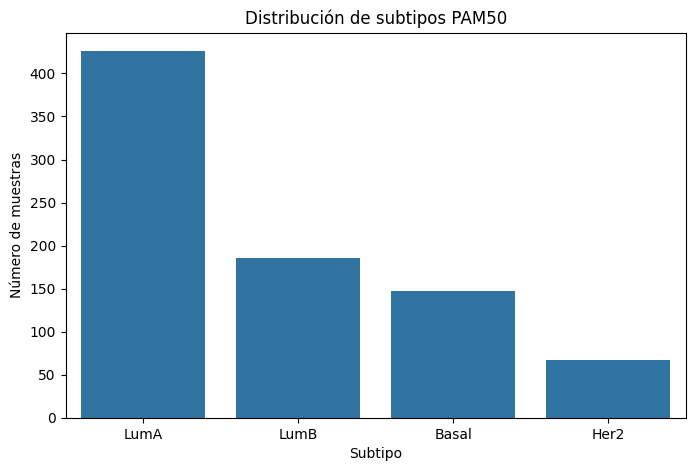

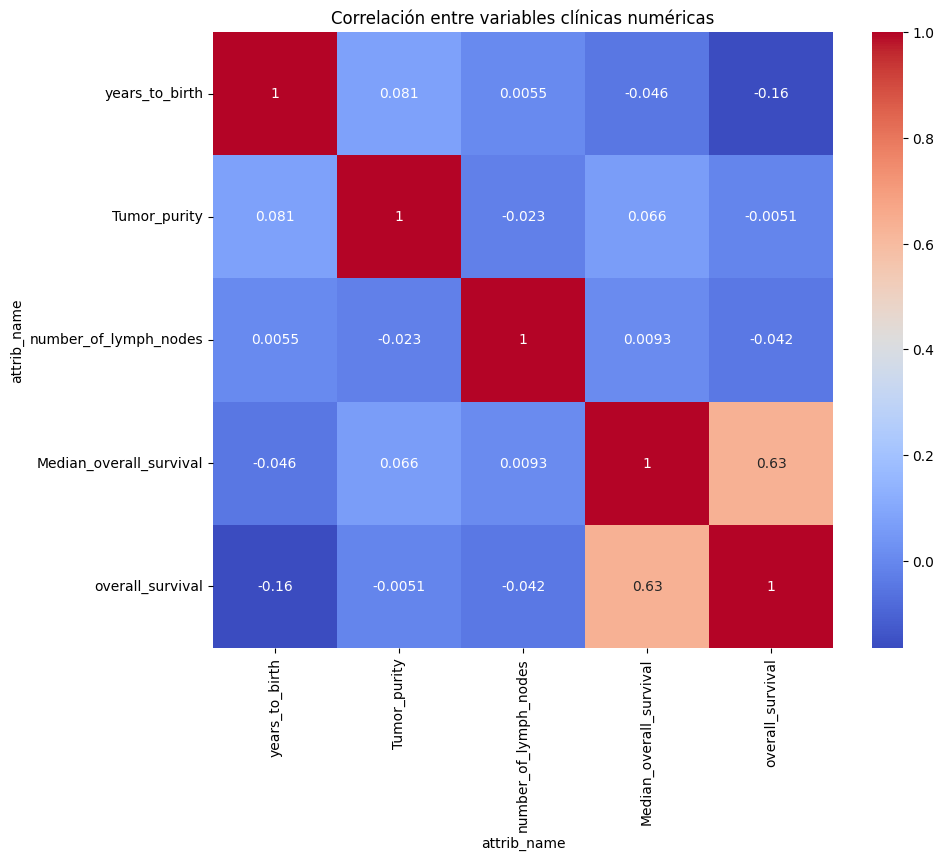

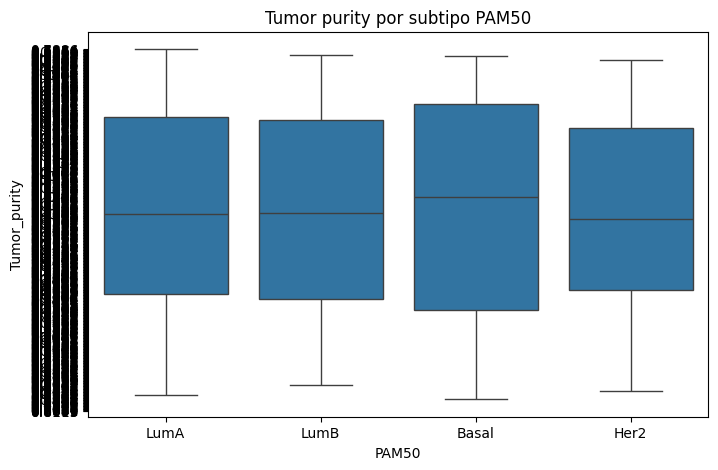

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Distribución de subtipos PAM50 (etiqueta objetivo)
plt.figure(figsize=(8,5))
sns.countplot(data=combined_data, x='PAM50', order=combined_data['PAM50'].value_counts().index)
plt.title('Distribución de subtipos PAM50')
plt.xlabel('Subtipo')
plt.ylabel('Número de muestras')
plt.show()

# 1.2 Matriz de correlación entre algunas variables clínicas numéricas
numeric_cols = ['years_to_birth', 'Tumor_purity', 'number_of_lymph_nodes', 'Median_overall_survival', 'overall_survival']
plt.figure(figsize=(10,8))
sns.heatmap(combined_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables clínicas numéricas')
plt.show()

# 1.3 Boxplot de Tumor_purity por subtipo PAM50
plt.figure(figsize=(8,5))
sns.boxplot(x='PAM50', y='Tumor_purity', data=combined_data)
plt.title('Tumor purity por subtipo PAM50')
plt.show()


In [12]:
# 2.1 Eliminar filas con valores faltantes en la columna objetivo 'PAM50'
combined_data = combined_data.dropna(subset=['PAM50'])

# 2.2 Imputar o eliminar valores faltantes en variables numéricas
# Por simplicidad, eliminaremos filas con NA en variables numéricas
combined_data = combined_data.dropna(subset=numeric_cols)

# 2.3 Codificar variables categóricas clínicas
categorical_cols = combined_data.select_dtypes(include = ["int64","object"]).columns

for col in categorical_cols:
    combined_data[col] = combined_data[col].astype('category').cat.codes

# 2.4 Preparar matriz X y vector y
X = combined_data.drop(columns=['PAM50'])
y = combined_data['PAM50']

# Codificar etiquetas objetivo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Clases:", le.classes_)


Clases: [0 1 2 3]


In [13]:
from sklearn.feature_selection import VarianceThreshold

# Eliminar genes con muy poca varianza (ejemplo: umbral 0.01)
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

print(f"Dimensión original: {X.shape}")
print(f"Dimensión después de VarianceThreshold: {X_reduced.shape}")


Dimensión original: (664, 20174)
Dimensión después de VarianceThreshold: (664, 19769)


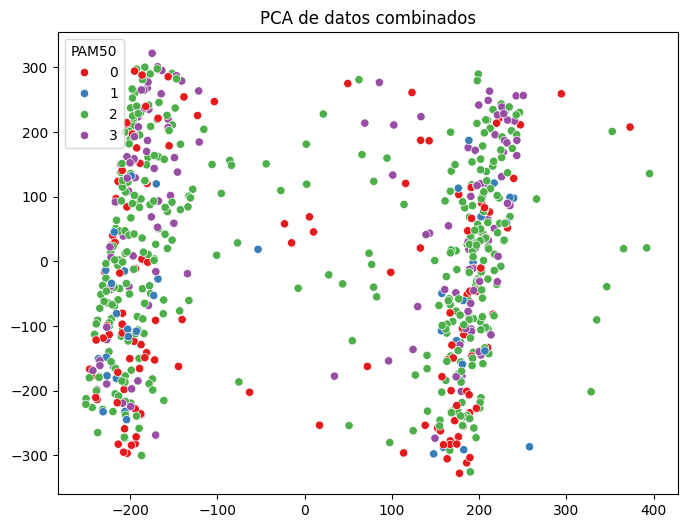

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title('PCA de datos combinados')
plt.show()


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# División en train/test (puedes usar la misma que usaste antes)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

n_clases = len(np.unique(y_encoded))  # Número de clases

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_clases, activation='softmax' if n_clases > 2 else 'sigmoid')
])


In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy' if n_clases > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,  # Puedes ajustar el número de épocas
    batch_size=32,
    verbose=1
)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6856 - loss: 1.9670 - val_accuracy: 0.8496 - val_loss: 0.8646
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8362 - loss: 1.3491 - val_accuracy: 0.9173 - val_loss: 0.5503
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8803 - loss: 0.9642 - val_accuracy: 0.9023 - val_loss: 0.7575
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8940 - loss: 0.9041 - val_accuracy: 0.8947 - val_loss: 1.0318
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9315 - loss: 0.6915 - val_accuracy: 0.9323 - val_loss: 1.0358
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9335 - loss: 0.8308 - val_accuracy: 0.8872 - val_loss: 1.0426
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9422 - loss: 0.4848 - val_accuracy: 0.9173 - val_loss: 0.9685
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9400 - loss: 0.5760 - val_accuracy: 0.8872 - v

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {accuracy:.4f}")

# Predicciones y métricas detalladas
y_pred_nn = np.argmax(model.predict(X_test), axis=1) if n_clases > 2 else (model.predict(X_test) > 0.5).astype(int).ravel()

print("=== Informe de Clasificación (Red Neuronal) ===")
print(classification_report(y_test, y_pred_nn, target_names=le.classes_))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 2.4679 
Accuracy en test: 0.8797
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
=== Informe de Clasificación (Red Neuronal) ===


TypeError: object of type 'numpy.int8' has no len()

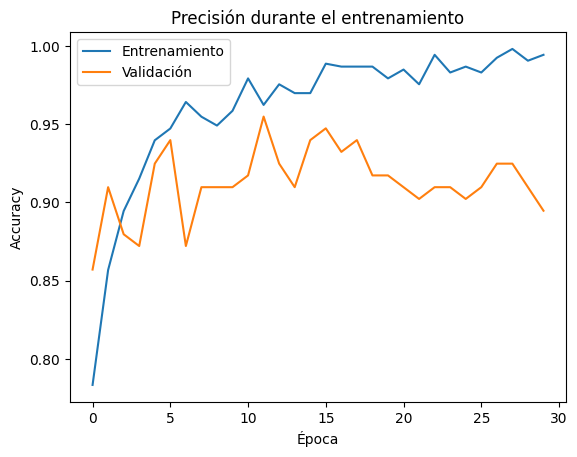

In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. División del dataset en entrenamiento y prueba con estratificación para balancear clases
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2. Inicialización y entrenamiento del modelo Random Forest con parámetros recomendados
rf = RandomForestClassifier(
    n_estimators=200,        # Más árboles para mejor generalización
    max_depth=None,          # Sin límite de profundidad, puede ajustar si hay overfitting
    random_state=42,
    n_jobs=-1                # Usa todos los cores disponibles para acelerar entrenamiento
)
rf.fit(X_train, y_train)

# 3. Predicción de etiquetas en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# 4. Asegurar que y_test y y_pred_rf sean arrays 1D y de tipo int estándar
y_test = np.asarray(y_test).astype(int).ravel()
y_pred_rf = np.asarray(y_pred_rf).astype(int).ravel()

# 5. Métricas de evaluación
print("=== Informe de Clasificación ===")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# 6. Matriz de confusión con visualización
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# 7. Importancia de características (top 10)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10

print(f"Top {top_n} características más importantes:")
for i in range(top_n):
    print(f"{i+1}. {X_reduced.columns[indices[i]]}: {importances[indices[i]]:.4f}")


=== Informe de Clasificación ===


TypeError: object of type 'numpy.int8' has no len()